**Build a model which predicts sales based on the money spent on different platforms for marketing using advertising.csv dataset.
#Here's a step-by-step guide to build this model using Python and some common machine learning libraries like pandas,numpy,seaborn and matplotlib:**

**1.Import Libraries: Start by importing the necessary libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

**2.Load and Explore Data: Load the dataset and understand its structure.**

In [2]:
df=pd.read_csv("advertising (2).csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#apply EDA means cleaning process
#1.to check null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
#cross check to datatypes of each columns
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

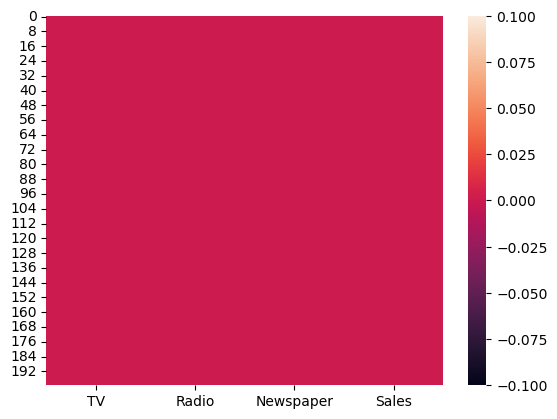

In [6]:
#visualize null values
sb.heatmap(df.isnull())
plt.show()

In [7]:
#to check duplicated values
df.duplicated().sum()

0

In [8]:
# now use to find the values of correlation between input and output
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


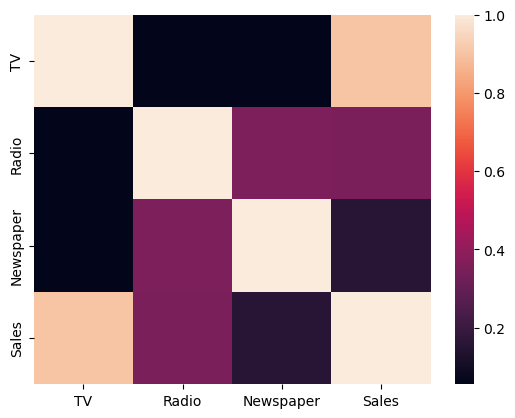

In [9]:
#now visualize correlation values using heatmap()
sb.heatmap(df.corr())
plt.show()

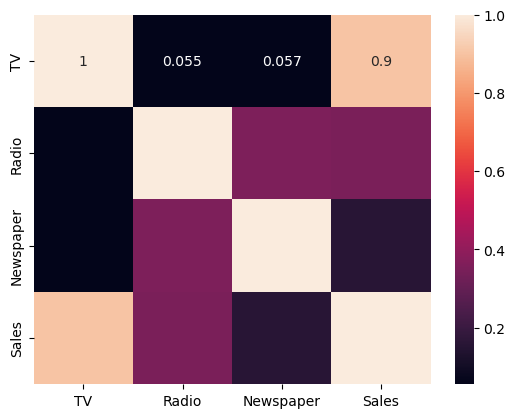

In [10]:
#annot is used to show the values of correlation in grahp
sb.heatmap(df.corr(),annot=True)  #by default false
plt.show()

**3.Data Preprocessing: Prepare the data for training the model.This involves selecting features and target variable, splitting the data into training and testing sets**

In [11]:
#select input and output from given dataset
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [12]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [13]:
x.shape,y.shape

((200, 3), (200,))

In [14]:
x.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [15]:
#train test split
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [17]:
x_train.shape,x_test.shape

((140, 3), (60, 3))

In [18]:
y_train.shape,y_test.shape

((140,), (60,))

In [19]:
#apply standard scaling
from sklearn.preprocessing import StandardScaler

In [20]:
#create object of standard scaler
ss=StandardScaler()

In [21]:
#apply scaling on y_train input x_train
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [22]:
type(x_train),type(x_test)

(numpy.ndarray, numpy.ndarray)

In [23]:
x_train

array([[-4.06353417e-02, -5.85620790e-01, -2.06132920e-01],
       [-3.94804599e-02, -5.72468161e-01, -9.22250511e-01],
       [-1.58586722e+00,  4.40284244e-01, -9.59451424e-01],
       [ 1.74250219e+00,  2.95605329e-01, -1.31286011e+00],
       [ 1.60160660e+00,  1.07818673e+00,  1.19820157e+00],
       [-1.54775611e+00,  1.68978396e+00,  2.09102351e+00],
       [-7.22015615e-01, -1.52603374e+00, -9.68751653e-01],
       [-5.56488053e-02,  1.52537611e+00,  1.34700523e+00],
       [ 9.75660659e-01, -4.86976075e-01,  9.23844836e-01],
       [-1.28444306e+00,  9.17395847e-02, -1.29425965e+00],
       [ 1.38564370e+00,  3.67944786e-01, -6.57194000e-01],
       [ 8.17441850e-01,  1.30178142e+00,  1.75176446e-01],
       [ 1.67320928e+00,  1.30178142e+00,  1.94221985e+00],
       [-1.51310966e+00,  9.00626246e-01,  7.05289467e-01],
       [-1.44150699e+00,  9.46660446e-01, -3.92137489e-01],
       [ 7.72401459e-01, -1.71312988e-01, -8.98999940e-01],
       [-1.37336896e+00,  7.82252588e-01

**4.Model Training: Train a linear regression model using the training data.**

In [24]:
#perform the model with linear regression
from sklearn.linear_model import LinearRegression

In [25]:
#create tye object of class linear regression
lr=LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
#check slope
lr.coef_

array([ 4.76446306,  1.55877627, -0.03241007])

In [28]:
#check intercept
lr.intercept_

14.847857142857142

 **5.Model Evaluation: Evaluate the trained model using testing data and metrics like Mean Squared Error (MSE) and R-squared.**

In [29]:
y_pred=lr.predict(x_test)

In [30]:
y_pred

array([21.28816103, 18.04213212, 10.0595901 , 21.08224067, 20.76476044,
       24.47187353, 16.80643646, 15.62885738, 10.12479884, 18.84601896,
       15.78389695, 10.54297035, 18.92928707, 15.52557996, 17.8412711 ,
       15.24120343, 13.74212833, 21.0643733 , 10.05392699, 19.26500889,
       11.16451173, 11.97211832,  8.61179009, 11.98972141, 12.59914023,
       16.8447954 ,  9.7170889 , 21.09489946, 18.13942474, 19.55008709,
       22.08796224, 17.78527998, 16.53883452, 14.77303861, 21.39458945,
       16.95491635, 17.22755002, 12.31866943, 21.04982199,  7.77473926,
        5.38467516,  9.63139004,  6.89549204, 19.19507436,  7.88125192,
       15.18766673, 13.70978421, 21.0232936 , 20.5350058 , 20.48867548,
       24.86087902, 14.96304281,  7.33545571, 19.35630325, 21.32554066,
       14.7719757 , 17.19642519,  7.11988693, 18.30096543,  9.65158222])

In [31]:
#create dict
dict={'actual output': y_test,'predicted output': y_pred}
df1=pd.DataFrame(dict)
df1

,actual output,predicted output
58,23.8,21.288161
40,16.6,18.042132
34,11.9,10.059590
102,19.8,21.082241
184,17.6,20.764760
198,25.5,24.471874
95,16.9,16.806436
4,17.9,15.628857
29,10.5,10.124799
168,17.1,18.846019


In [32]:
#evaluation of model
#check mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

Mean Squared Error:  2.370659971225656


**Overall, this project demonstrates the process of building a predictive model for sales based on advertising spending, starting from data loading and preprocessing, model training, evaluation, visualization, and interpretation of results**